Задача 3. Многоклассовая классификация и множественная классификация/регрессия

Левков Данил Андреевич (22.М05)

Выполнил задачи:
* Изучите возможности sklearn для решения задач Multiclass classification, Multilabel classification и Multioutput Regression. Основные компоненты библиотеки указаны на рисунке ниже.
* Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
* Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
* При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
* Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.
* Замерить время обучения каждой модели для каждой стратегии.
* Для оценки качества моделей используйте метрику AUC-ROC.
* Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

1) Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

Для анализа выберем датасет для определения типа стекла по его физическим свойствам
Признаки:
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Целевой признак Type:
-- 1 building windows float processed 
-- 2 building windows non float processed 
-- 3 vehicle windows float processed
-- 4 vehicle windows non floatprocessed
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [31]:
import pandas as pd

df = pd.read_csv('data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Произведем чистку данных и проверим наличие всех классов

In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Видим, что в текущем датасете отсутсвуют записи с 4-ым типом стекла. Перенумеруем 7-ой тип на 4-ый для удобства

In [35]:
df.loc[df.Type == 7, 'Type'] = 4

In [38]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.373832
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,1.427584
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,6.000000


Все признаки имеют тип с плавающей точкой.

2) Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

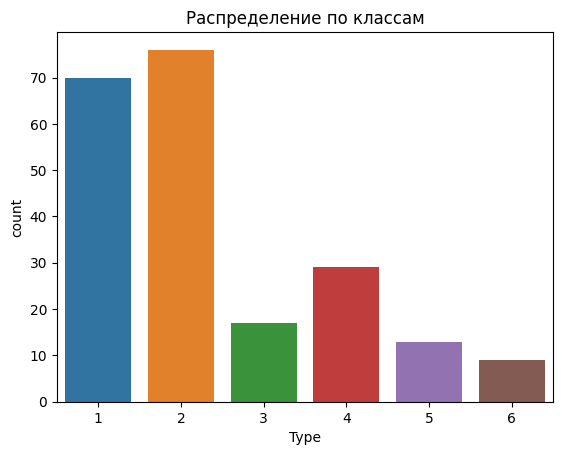

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Type", data=df)
plt.title('Распределение по классам')
plt.show()

Заметим, что 1 и 2 типы встречаюися в наборе гораздо чаще, чем остальные, что может плохо повлиять на общую оценку точности модели.

Построим график зависимости средних значений от класса для каждого параметра

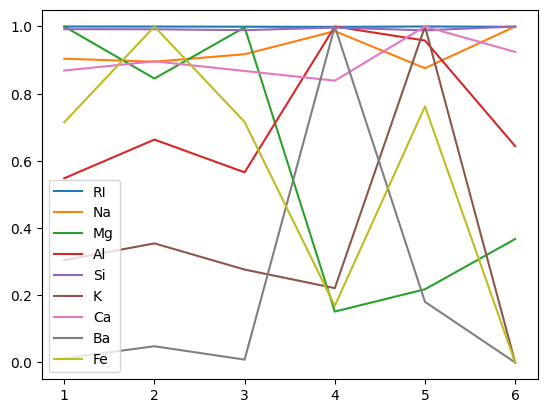

In [37]:
meanByType = df.groupby('Type').mean()
t = meanByType.index
for param in meanByType.columns:
    plt.plot(t, meanByType[param] / max(meanByType[param]), label=param)
plt.legend(loc='best')
plt.show()

Из графика получим, что параметры Rl, Si, Na, Ca в среднем практически одинаковы для всех классов. В то же время по величине значения Ba можно хорошо идетнифицировать 4 класс, а с помощью Mg и Fe можно выделить 1 и 2 классы от остальных. Параметр K хорошо определяет 5 класс

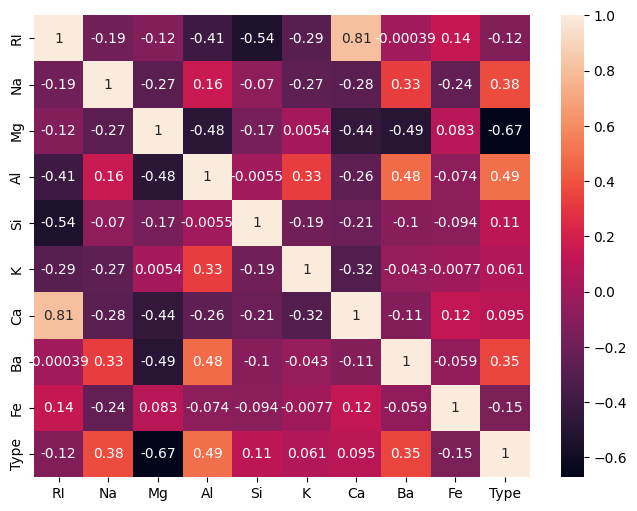

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

Отметим, что большую корреляцию между собой имеют признаки Ca и Rl, Rl и Si

3) При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Все признаки уже являются колличественными. Однако некоторые ввиду предыдущих рассуждений могут оказаться менее значимыми, проведим это с помощью RFE. В качестве оценщика выберем Дерево Решений

In [49]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

X = df.drop(['Type'], axis=1)
y = df['Type']

rfe = rfe.fit(X, y)

SelectedCols = frozenset(X.columns[rfe.support_])
DeletedCols = [item for item in X.columns if item not in SelectedCols]
print(DeletedCols)

['K', 'Fe']


In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=7)

X = df.drop(['Type'], axis=1)
y = df['Type']

rfe = rfe.fit(X, y)

SelectedCols = frozenset(X.columns[rfe.support_])
DeletedCols = [item for item in X.columns if item not in SelectedCols]
print(DeletedCols)

['RI', 'Si']


C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\stude\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Для логистической регрессии, как и ожидалось из графика представленного выше, самыми незначимыми оказались признаки ['RI', 'Si']. Однако для Дерева Решений они являются достаточно полезными. Поэтому было принято решение оставить все признаки.

4) Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.
Замерить время обучения каждой модели для каждой стратегии.
Для оценки качества моделей используйте метрику AUC-ROC.

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier

в качестве параметра scoring всегда будем использовать roc_auc

In [67]:
from prettytable import PrettyTable
results = PrettyTable(["Model", "Strategy", "Time elapsed", "Accuracy (test)"])

Logistic Regression

In [ ]:
pipeline = Pipeline([('scalar', StandardScaler()), ('model', LogisticRegression())])
parameters = { 
    'model__C': [1, 3, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver':['newton-cg', 'lbfgs', 'liblinear'],
    'model__max_iter': [1000, 10000]
}
grid = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', cv = 3)

# OneVsRest

classifier = OneVsRestClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Logistic Regression', 'OneVsRest', elapsedTime, accuracy_score(y_test, y_pred)])


# OneVsOne

classifier = OneVsOneClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Logistic Regression', 'OneVsOne', elapsedTime, accuracy_score(y_test, y_pred)])

# OutputCode

classifier = OutputCodeClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Logistic Regression', 'OutputCode', elapsedTime, accuracy_score(y_test, y_pred)])

SVM

In [69]:
pipeline = Pipeline([('scalar', StandardScaler()), ('model', SVC())])
parameters = {
  'model__C': [0.001, 0.1, 10],
  'model__kernel': ['poly', 'sigmoid'],
  'model__coef0': [0.5, 0.05]
  }

grid = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', cv = 3)

# OneVsRest

classifier = OneVsRestClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['SVM', 'OneVsRest', elapsedTime, accuracy_score(y_test, y_pred)])


# OneVsOne

classifier = OneVsOneClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['SVM', 'OneVsOne', elapsedTime, accuracy_score(y_test, y_pred)])

# OutputCode

classifier = OutputCodeClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['SVM', 'OutputCode', elapsedTime, accuracy_score(y_test, y_pred)])

KNN

In [ ]:
pipeline = Pipeline([('scalar', StandardScaler()), ('model', KNeighborsClassifier())])
parameters = {
  'model__n_neighbors': [2, 5, 10],
  'model__weights': ['uniform', 'distance'],
  'model__algorithm': ['ball_tree', 'kd_tree', 'brute']
  }

grid = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', cv = 3)

# OneVsRest

classifier = OneVsRestClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['KNN', 'OneVsRest', elapsedTime, accuracy_score(y_test, y_pred)])


# OneVsOne

classifier = OneVsOneClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['KNN', 'OneVsOne', elapsedTime, accuracy_score(y_test, y_pred)])

# OutputCode

classifier = OutputCodeClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['KNN', 'OutputCode', elapsedTime, accuracy_score(y_test, y_pred)])

Naive Bayes

In [71]:
pipeline = Pipeline([('scalar', StandardScaler()), ('model', GaussianNB())])
parameters = {
  'model__var_smoothing': [1e-9, 0.00001, 0.01]
  }

grid = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', cv = 3)

# OneVsRest

classifier = OneVsRestClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Naive Bayes', 'OneVsRest', elapsedTime, accuracy_score(y_test, y_pred)])


# OneVsOne

classifier = OneVsOneClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Naive Bayes', 'OneVsOne', elapsedTime, accuracy_score(y_test, y_pred)])

# OutputCode

classifier = OutputCodeClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Naive Bayes', 'OutputCode', elapsedTime, accuracy_score(y_test, y_pred)])

Decision Tree

In [72]:
pipeline = Pipeline([('scalar', StandardScaler()), ('model', DecisionTreeClassifier())])
parameters = {
  'model__criterion': ['gini','entropy','log_loss'],
  'model__splitter': ['best','random'],
  'model__max_depth': [3,5,10],
  }

grid = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', cv = 3)

# OneVsRest

classifier = OneVsRestClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Decision Tree', 'OneVsRest', elapsedTime, accuracy_score(y_test, y_pred)])


# OneVsOne

classifier = OneVsOneClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Decision Tree', 'OneVsOne', elapsedTime, accuracy_score(y_test, y_pred)])

# OutputCode

classifier = OutputCodeClassifier(grid)

startTime = time.time()
classifier.fit(x_train, y_train.ravel())
elapsedTime = time.time() - startTime
y_pred = classifier.predict(x_test)
results.add_row(['Decision Tree', 'OutputCode', elapsedTime, accuracy_score(y_test, y_pred)])

In [73]:
print(results)

+---------------------+------------+---------------------+---------------------+
|        Model        |  Strategy  |     Time elapsed    |   Accuracy (test)   |
+---------------------+------------+---------------------+---------------------+
| Logistic Regression | OneVsRest  |  6.945412874221802  |  0.6461538461538462 |
| Logistic Regression |  OneVsOne  |  8.319164276123047  |  0.6461538461538462 |
| Logistic Regression | OutputCode |  10.551342010498047 |         0.6         |
|         SVM         | OneVsRest  |  1.3783588409423828 |  0.6461538461538462 |
|         SVM         |  OneVsOne  |  1.395223617553711  |  0.5076923076923077 |
|         SVM         | OutputCode |  2.644864797592163  |  0.6461538461538462 |
|         KNN         | OneVsRest  |  3.733238935470581  |  0.6615384615384615 |
|         KNN         |  OneVsOne  |  6.456359148025513  |  0.7076923076923077 |
|         KNN         | OutputCode |  6.476664781570435  |  0.6615384615384615 |
|     Naive Bayes     | OneV

Выводы:

В случае логистической регрессии точность практически не зависила от выбранной стратегии, хотя время, потраченное на последнюю, в 1.5 раза больше чем на первую.
Аналогичная картина наблюдается и для SVM, и для KNN, однако отношение времени уже составляет 2 раза.
Интересно заметить, что для метода опорных векторов выбор стратегии OneVsOne испортил результат, в то время как для метода ближайших соседей та же стратегия улучшила его.
Naive Bayes показал худший результат, но и самое короткое время.
Решающие деревья в данном случае имеют лучшее соотношение скросость \ качество.

Максимальным показателем точности является значение 0.707, которое само по себе не является высоким. Данный факт может быть следствием малого количества элементов в выборке.